In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.ensemble import IsolationForest




sns.set(style="whitegrid")

##### Charger les données

In [2]:
import pandas as pd

df_compteurs = pd.read_csv("/home/marwa/prevision-du-Trafic-Cyclable/notebooks/data/MMM_MMM_GeolocCompteurs .csv")
df_compteurs.head()


,Nom du com,N° Série,N° Sér_1,Latitude,Longitude,OSM_Line_i
0,Compteur Vélo Tanneurs,XTH19101158,XTH19101158,43.616209,3.874408,188609530
1,Compteur Piéton/Vélo Berracasa,X2H19070220,X2H19070220,43.609699,3.896940,121403593
2,Compteur Vélo Lodève Celleneuve,Y2H20042633,X2H20042633,43.614650,3.833600,734202564
3,Compteur Vélo Lavérune,X2H20042632,X2H20042632,43.590700,3.813240,97705885
4,Compteur Vélo Vieille poste,ZLT25011699,ZLT25011699,43.615742,3.909632,676645909


###### Vérifier les valeurs manquantes

In [3]:
# Vérifier les valeurs manquantes
df_compteurs.isna().sum()

Nom du com     0
N° Série       0
N° Sér_1      28
Latitude       0
Longitude      0
OSM_Line_i     0
dtype: int64

###### Nombre de compteurs :

In [4]:
print("Nombre de compteurs :", df_compteurs.shape[0])


Nombre de compteurs : 53


##### Distribution par latitude/longitude

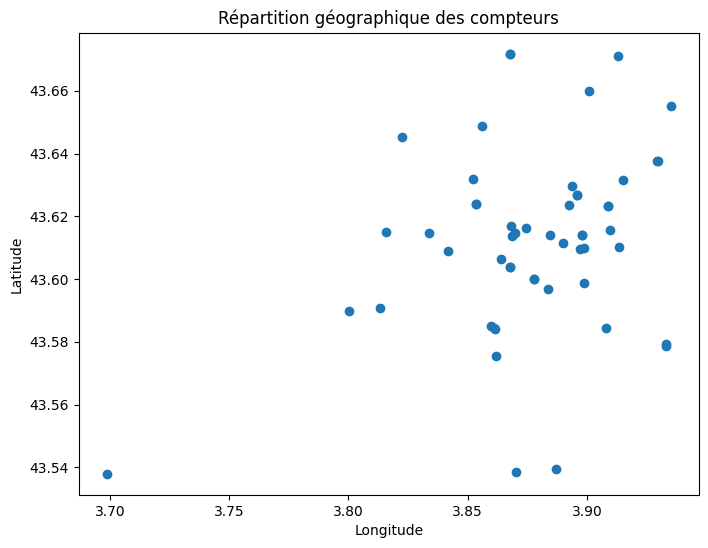

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df_compteurs['Longitude'], df_compteurs['Latitude'])
plt.title("Répartition géographique des compteurs")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


###### Compteurs avec doublons ou mêmes coordonnées :

In [10]:
df_compteurs[df_compteurs.duplicated(subset=['Latitude','Longitude'], keep=False)]


,Nom du com,N° Série,N° Sér_1,Latitude,Longitude,OSM_Line_i
5,Compteur Vélo Delmas 2,Y2H20063164,X2H20063164,43.626698,3.895629,105575465
6,Compteur Vélo Delmas 1,Y2H20063163,X2H20063163,43.626698,3.895629,105575465
11,Compteur Vélo Père Soulas 1,X2H21070341,NaN,43.623870,3.853390,135001721
12,Compteur Vélo Père Soulas 2,X2H21070342,NaN,43.623870,3.853390,135001721
13,Compteur Vélo M17 Montferrier 1,X2H21070343,NaN,43.671790,3.867914,755700690
14,Compteur Vélo N17 Montferrier 2,X2H21070347,NaN,43.671790,3.867914,755700690
35,Compteur Vélo Vieussens1,X2H22104775,NaN,43.600100,3.877600,8584788
36,Compteur Vélo Vieussens2,X2H22104776,NaN,43.600100,3.877600,8584788
37,Compteur Vélo Pompignane1,X2H22104773,NaN,43.614000,3.898100,376991821
38,Compteur Vélo Pompignane2,X2H22104774,NaN,43.614000,3.898100,31450626


In [13]:
import folium

m = folium.Map(location=[43.61, 3.87], zoom_start=12)

for _, row in df_compteurs.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=4,
        tooltip=row['Nom du com']
    ).add_to(m)

m


In [42]:
# df_compteurs_api = df_compteurs[df_compteurs['Nom du com'].isin(df_api_compteurs['nom_compteur'])]
